In [1]:
from omero.gateway import BlitzGateway
import aggregator
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
from skimage.io import imsave
from tqdm import tqdm


In [2]:
# def save_fig(path, fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
#     dest = pathlib.Path(path) / f"{fig_id}.{fig_extension}"
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(dest, format=fig_extension, dpi=resolution)

In [2]:
pathlib.Path.home()

PosixPath('/Users/Lab')

In [3]:
ID = 814
d_path = pathlib.Path.home() / 'Documents'

conn = BlitzGateway('hy274', 'omeroreset', host='ome2.hpc.susx.ac.uk')
conn.connect()

plate = conn.getObject("Plate", ID)
path = pathlib.Path(d_path) / f"{plate.getName()}_Flatfield_Corr_814"
path.mkdir(exist_ok=True)

In [5]:
well_id=[6504,6505,6468,6510,6526,6545,6466,6544,6509,6499,6633,6592,6579,6557,6621,6580,6548,6565,6601,6587,6583,6591,6622,6551,6631,6575,6558,6620,6576,6555,6614,6753,6596,6599,6524,6535,6546,6479,6522,6469,6495,6529,6519,6508,6520,6474,6463,6455,6501,6458,6452,6476,6481,6483,6511,6473,6456,6486,6506,6451,6533,6497,6517,6512,6521,6500,6502,6488,6542,6475,6527,6490,]
well_id[30]

6614

In [7]:
import pandas as pd
import cv2
conn = BlitzGateway('hy274', 'omeroreset', host='ome2.hpc.susx.ac.uk')
conn.connect()
Feature_list=['label','area','max_intensity','mean_intensity']
df_final=pd.DataFrame()
# plateId=813
df_cell_phase=pd.DataFrame()
df_label=pd.DataFrame()
# 6504,6505,6468,6510,6526,6545,6466,6544,6509,6499,6633,6592,6579,6557,6621,6580,6548,6565,6601,6587,6583,6591,6622,6551,6631,6575,6558,6620,6576,6555,6614
well_id=[6596,6599,6524,6535,6546,6479,6522,6469 ,6495,6529,6519,6508,6520,6474,6463,6455,6501,6458,6452,6476,6481,6483,6511,6473,6456,6486,6506,6451,6533,6497,6517,6512,6521,6500,6502,6488,6542,6475,6527,6490,]
for ic,ind in enumerate(well_id):
    print(ic)
    WellID = ind
    well = conn.getObject("Well", WellID)

    for channel in range(4):
        # channel=3
        agg = aggregator.ImageAggregator(60)
        for index, image in enumerate(well.listChildren()):
            image = well.getImage(index)
            pixels=image.getPrimaryPixels()
            img=pixels.getPlane(0,channel,0)
            agg.add_image(img)

#     # Get the aggregated background
        agg_img = agg.get_image()
        blurred_agg_img = agg.get_gaussian_image(30)
        norm_agg_img = blurred_agg_img / blurred_agg_img.mean()
        cv2.imwrite('/Users/Lab/Documents/RPE-1_10000_Flatfield_Corr_814/aggregator/'+f'{ind}'+'_'+f'{channel}'+'.tif',norm_agg_img)
        for index, image in enumerate(well.listChildren()):
            image = well.getImage(index)
            id_img=well.getImage(index).getId()
            pixels=image.getPrimaryPixels()
            img=pixels.getPlane(0,channel,0)
            corr_img=img/norm_agg_img
            cv2.imwrite('/Users/Lab/Documents/RPE-1_10000_Flatfield_Corr_814/'f'{channel}'+'/'+f'{id_img}'+'.tif',corr_img)
#             example_img = conn.getObject("Image", id_img)
#             pixels=example_img.getPrimaryPixels()
#
#             min = img.min()
#             percentiles = np.percentile(img, (1, 99))
#             scaled = exposure.rescale_intensity(img, in_range=tuple(percentiles))
#             corr_img = img/norm_agg_img
#             corr_scaled = exposure.rescale_intensity(corr_img, in_range=tuple(percentiles))3
#
#             fig, ax = plt.subplots(ncols=4, figsize=(16, 5))
#             plt.sca(ax[0])
#             plt.imshow(scaled, cmap='gray')
#             plt.title(f"{id_img} Channel {3}")
#             plt.sca(ax[1])
#             diag = np.diagonal(img)
#             plt.plot(range(len(diag)), diag)
#             plt.ylim(min,5*min)
#             plt.sca(ax[2])
#             plt.imshow(corr_scaled, cmap='gray')
#             plt.title(f"{id_img} Channel {3} flatfield corrected")
#             plt.sca(ax[3])
#             bg_diag = np.diagonal(img/norm_agg_img)
#             plt.plot(range(len(bg_diag)), bg_diag)
#             plt.ylim(min, 5*min)
# # save_fig(path, f"Channel{channel}_Flatfield_correction")
#             plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [8]:
from PIL import Image
import skimage
image_CH0=skimage.io.imread('/Users/haoranyue/PycharmProjects/pythonProject4/RPE-1_10000_Flatfield_Corr/Contrast_Ch0.tif')
norm_image_CH0=image_CH0/image_CH0.mean()
image_CH1=skimage.io.imread('/Users/haoranyue/PycharmProjects/pythonProject4/RPE-1_10000_Flatfield_Corr/Contrast_Ch1.tif')
norm_image_C1=image_CH0/image_CH1.mean()
image_CH2=skimage.io.imread('/Users/haoranyue/PycharmProjects/pythonProject4/RPE-1_10000_Flatfield_Corr/Contrast_Ch2.tif')
norm_image_CH2=image_CH0/image_CH2.mean()
image_CH3=skimage.io.imread('/Users/haoranyue/PycharmProjects/pythonProject4/RPE-1_10000_Flatfield_Corr/Contrast_Ch3.tif')
norm_image_CH3=image_CH0/image_CH3.mean()

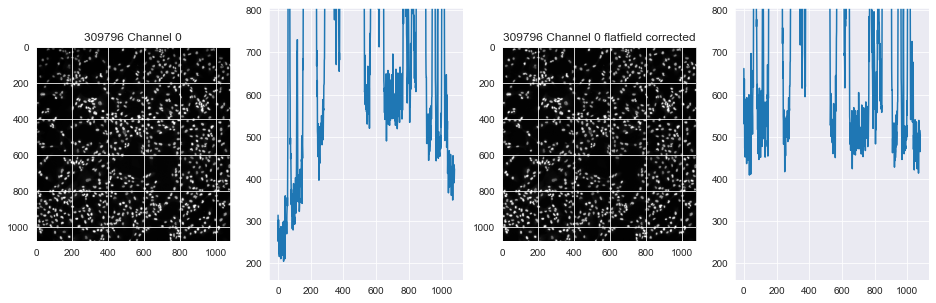

In [10]:
norm_image_CH0
example_img = conn.getObject("Image", image_id)
pixels=example_img.getPrimaryPixels()
img=pixels.getPlane(0,0,0)
min = img.min()
percentiles = np.percentile(img, (1, 99))
scaled = exposure.rescale_intensity(img, in_range=tuple(percentiles))
corr_img = img / norm_image_CH0
corr_scaled = exposure.rescale_intensity(corr_img, in_range=tuple(percentiles))

fig, ax = plt.subplots(ncols=4, figsize=(16, 5))
plt.sca(ax[0])
plt.imshow(scaled, cmap='gray')
plt.title(f"{example_img.getId()} Channel {0}")
plt.sca(ax[1])
diag = np.diagonal(img)
plt.plot(range(len(diag)), diag)
plt.ylim(min,5*min)
plt.sca(ax[2])
plt.imshow(corr_scaled, cmap='gray')
plt.title(f"{example_img.getId()} Channel {0} flatfield corrected")
plt.sca(ax[3])
bg_diag = np.diagonal(img/norm_image_CH0)
plt.plot(range(len(bg_diag)), bg_diag)
plt.ylim(min, 5*min)
# save_fig(path, f"Channel{channel}_Flatfield_correction")
plt.show()


In [11]:
corr_scaled


array([[0.02012227, 0.02926445, 0.02108428, ..., 0.00998759, 0.00970787,
        0.00684962],
       [0.01973541, 0.01242538, 0.02180994, ..., 0.00682704, 0.00282521,
        0.0086521 ],
       [0.01885346, 0.01859325, 0.01536676, ..., 0.00986704, 0.00968292,
        0.01178806],
       ...,
       [0.0289462 , 0.02519527, 0.02634467, ..., 0.00855771, 0.01002922,
        0.00975498],
       [0.03477607, 0.02620404, 0.02394832, ..., 0.0126156 , 0.00961798,
        0.01346538],
       [0.03013503, 0.02962263, 0.02886064, ..., 0.01297302, 0.00892669,
        0.01088824]])

In [21]:
plt.imshow(image1)

SyntaxError: unmatched ']' (1694535998.py, line 1)

In [20]:
object= conn.getObject("Image", 310353
                       )
pixels=object.getPrimaryPixels()
imgall=object.renderImage(object.getSizeZ()/2,0)

imgDAPI=pixels.getPlane(0,0,0)
imgCell=pixels.getPlane(0,3,0)
imgEdu=pixels.getPlane(0,1,0)
imgH3=pixels.getPlane(0,2,0)
imgall=object.renderImage(object.getSizeZ()/2,0)

In [21]:
import  numpy as np
imgarray=np.array(imgall)

In [22]:
imgarray.shape

(1080, 1080, 3)

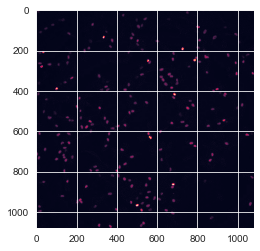

In [23]:
plt.imshow(imgarray[:,:,0])
plt.show()

In [12]:
agg = aggregator.ImageAggregator(60)
agg.add_image(imgarray)
#     # Get the aggregated background
agg_img = agg.get_image()
blurred_agg_img = agg.get_gaussian_image(30)
imsave(f"{pathlib.Path(path)}/Contrast_Ch{5}.tif", blurred_agg_img)
norm_agg_img = blurred_agg_img / blurred_agg_img.mean()

/var/folders/bw/r4r56f697x343wvnh40cm45m0000gn/T/ipykernel_36166/2778139740.py:6: UserWarning: /Users/haoranyue/Desktop/RPE-1_10000_Flatfield_Corr/Contrast_Ch5.tif is a low contrast image
  imsave(f"{pathlib.Path(path)}/Contrast_Ch{5}.tif", blurred_agg_img)
/var/folders/bw/r4r56f697x343wvnh40cm45m0000gn/T/ipykernel_36166/2778139740.py:7: RuntimeWarning: invalid value encountered in true_divide
  norm_agg_img = blurred_agg_img / blurred_agg_img.mean()


In [ ]:
norm_agg_img

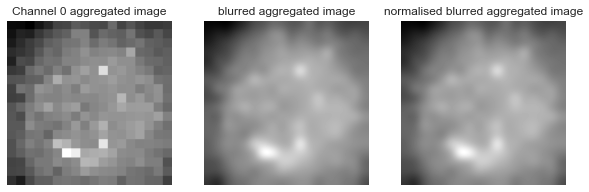

Saving figure Channel0_Flatfield_correction


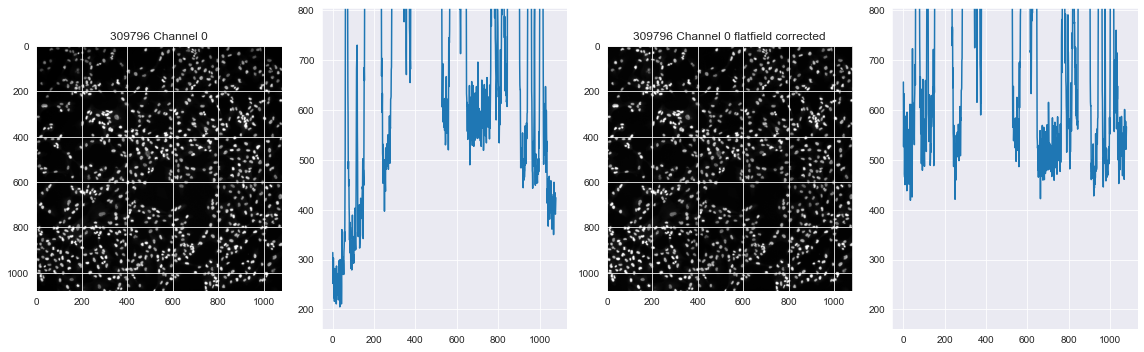

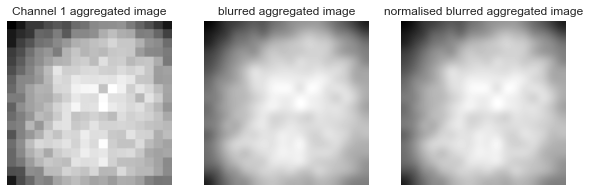

Saving figure Channel1_Flatfield_correction


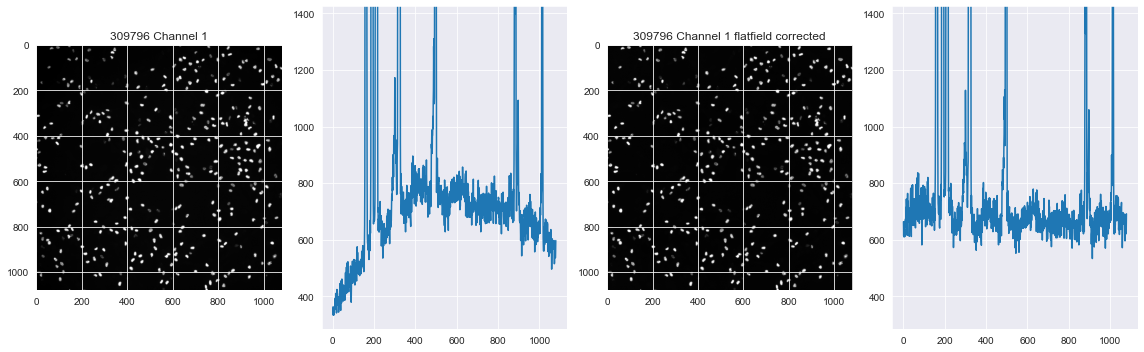

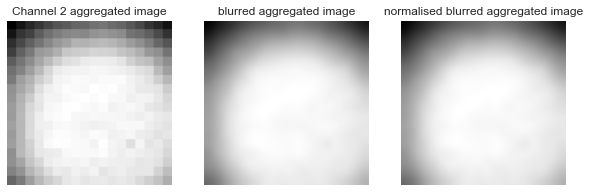

Saving figure Channel2_Flatfield_correction


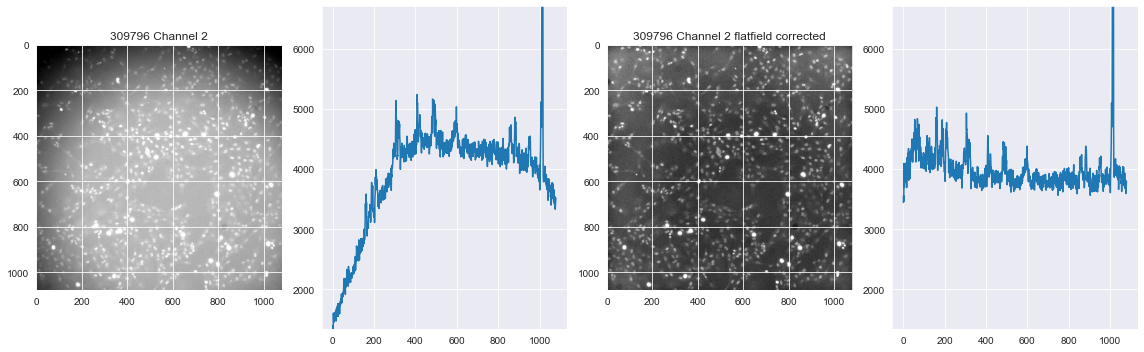

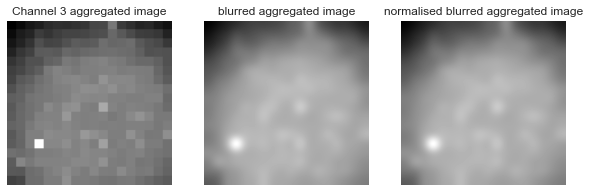

Saving figure Channel3_Flatfield_correction


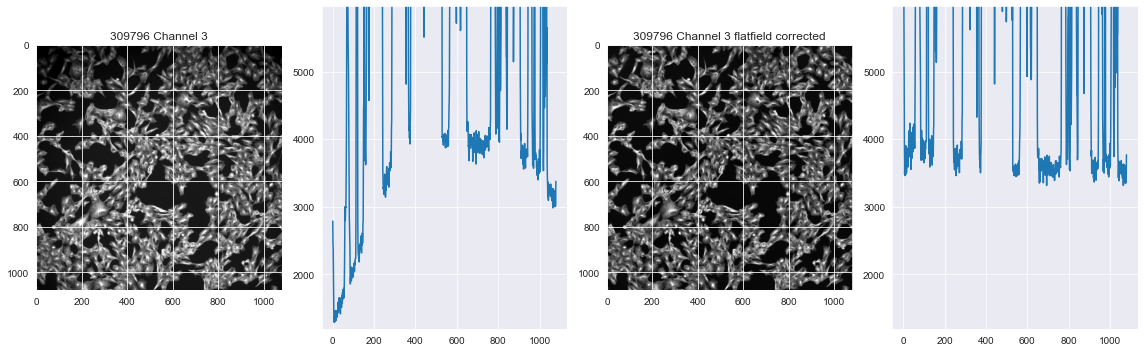

In [8]:
for channel in range(size_c):
    agg = aggregator.ImageAggregator(60)
    agg.add_image(pixels.getPlane(0,channel,0))
#     # Get the aggregated background
    agg_img = agg.get_image()
    blurred_agg_img = agg.get_gaussian_image(30)
    imsave(f"{pathlib.Path(path)}/Contrast_Ch{channel}.tif", blurred_agg_img)
    norm_agg_img = blurred_agg_img / blurred_agg_img.mean()
    img_list=[agg_img, blurred_agg_img, norm_agg_img]
    fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
    plt.sca(ax[0])
    plt.imshow(agg_img, cmap='gray')
    plt.axis('off')
    plt.title(f"Channel {channel} aggregated image")
    plt.sca(ax[1])
    plt.imshow(blurred_agg_img, cmap='gray')
    plt.axis('off')
    plt.title("blurred aggregated image")
    plt.sca(ax[2])
    plt.imshow(norm_agg_img, cmap='gray')
    plt.axis('off')
    plt.title("normalised blurred aggregated image")
    plt.tight_layout
    save_fig(path, f"Channel{channel}_background_image")
    plt.show()

    example_img = conn.getObject("Image", image_id)
    pixels=example_img.getPrimaryPixels()
    img=pixels.getPlane(0,channel,0)
    min = img.min()
    percentiles = np.percentile(img, (1, 99))
    scaled = exposure.rescale_intensity(img, in_range=tuple(percentiles))
    corr_img = img / norm_agg_img
    corr_scaled = exposure.rescale_intensity(corr_img, in_range=tuple(percentiles))

    fig, ax = plt.subplots(ncols=4, figsize=(16, 5))
    plt.sca(ax[0])
    plt.imshow(scaled, cmap='gray')
    plt.title(f"{example_img.getId()} Channel {channel}")
    plt.sca(ax[1])
    diag = np.diagonal(img)
    plt.plot(range(len(diag)), diag)
    plt.ylim(min,5*min)
    plt.sca(ax[2])
    plt.imshow(corr_scaled, cmap='gray')
    plt.title(f"{example_img.getId()} Channel {channel} flatfield corrected")
    plt.sca(ax[3])
    bg_diag = np.diagonal(img/norm_agg_img)
    plt.plot(range(len(bg_diag)), bg_diag)
    plt.ylim(min, 5*min)
    save_fig(path, f"Channel{channel}_Flatfield_correction")
#     plt.show()



In [29]:
corr_scaled.dtype

dtype('float64')

In [1]:
for channel in tqdm(range(size_c)):
    agg = aggregator.ImageAggregator(60)
    for well in tqdm(plate.listChildren()):
        index = well.countWellSample()

        for index in range(index):

            Image= well.getImage(index)
            pixels=Image.getPrimaryPixels()
            img=pixels.getPlane(0,channel,0)
            agg.add_image(img)


NameError: name 'tqdm' is not defined

In [10]:
for channel in range(size_c):
    agg = aggregator.ImageAggregator(60)
    for well in tqdm(plate.listChildren()):
        index = well.countWellSample()

        for index in tqdm(range(index)):
            print(index)
            Image= well.getImage(index)
            pixels=Image.getPrimaryPixels()
            img=pixels.getPlane(0,channel,0)
            agg.add_image(img)
    print(agg_img.shape)

    # Get the aggregated background
    agg_img = agg.get_image()
    # Get the smoothed mean background
    blurred_agg_img = agg.get_gaussian_image(30)
    imsave(f"{pathlib.Path(path)}/Contrast_Ch{channel}.tif", blurred_agg_img)
    # normalise````````
    #a = a - bias
    norm_agg_img = blurred_agg_img / blurred_agg_img.mean()
    img_list=[agg_img, blurred_agg_img, norm_agg_img]
    fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
    plt.sca(ax[0])
    plt.imshow(agg_img, cmap='gray')
    plt.axis('off')
    plt.title(f"Channel {channel} aggregated image")
    plt.sca(ax[1])
    plt.imshow(blurred_agg_img, cmap='gray')
    plt.axis('off')
    plt.title("blurred aggregated image")
    plt.sca(ax[2])
    plt.imshow(norm_agg_img, cmap='gray')
    plt.axis('off')
    plt.title("normalised blurred aggregated image")
    plt.tight_layout
    save_fig(path, f"Channel{channel}_background_image")
    plt.show()
#
#
#     example_img = conn.getObject("Image", image_id)
#     pixels=example_img.getPrimaryPixels()
#     img=pixels.getPlane(0,channel,0)
#     min = img.min()
#     percentiles = np.percentile(img, (1, 99))
#     scaled = exposure.rescale_intensity(img, in_range=tuple(percentiles))
#     corr_img = img / norm_agg_img
#     corr_scaled = exposure.rescale_intensity(corr_img, in_range=tuple(percentiles))
#
#     fig, ax = plt.subplots(ncols=4, figsize=(16, 5))
#     plt.sca(ax[0])
#     plt.imshow(scaled, cmap='gray')
#     plt.title(f"{example_img.getId()} Channel {channel}")
#     plt.sca(ax[1])
#     diag = np.diagonal(img)
#     plt.plot(range(len(diag)), diag)
#     plt.ylim(min,5*min)
#     plt.sca(ax[2])
#     plt.imshow(corr_scaled, cmap='gray')
#     plt.title(f"{example_img.getId()} Channel {channel} flatfield corrected")
#     plt.sca(ax[3])
#     bg_diag = np.diagonal(img/norm_agg_img)
#     plt.plot(range(len(bg_diag)), bg_diag)
#     plt.ylim(min, 5*min)
#     save_fig(path, f"Channel{channel}_Flatfield_correction")
#     plt.show()
#
# conn.close()

  0%|          | 0/4 [00:00<?, ?it/s]
0it [00:00, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 9794.69it/s]

1it [00:00,  1.11it/s]

0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 126673.61it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 41850.04it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 112347.43it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 152212.65it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 39652.03it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 100129.27it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 37786.52it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 146882.24it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 176395.96it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 164124.94it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 25199.42it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 57368.90it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 148034.26it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 138273.76it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 158608.13it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 155986.51it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 159952.27it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 118334.60it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 52356.08it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 149204.49it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 116869.15it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 68759.08it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 177224.11it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 18324.63it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 138273.76it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 150393.37it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 219469.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 224694.86it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 218200.79it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 176395.96it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 191617.95it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 20229.76it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 16398.23it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 209715.20it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 177224.11it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 66109.87it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 191617.95it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 224694.86it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 96791.63it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 219469.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 85792.58it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 26105.63it/s]

43it [00:01, 58.48it/s]

0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 35848.75it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 29514.26it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 64749.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 99078.05it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 23861.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 23861.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 145187.45it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 9782.00it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 4792.27it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 13781.94it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 3767.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 34348.26it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 3971.46it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 29983.11it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 195589.31it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 13066.37it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 37976.60it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 60013.89it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 81005.87it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 68759.08it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 184140.18it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 177224.11it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 47363.53it/s]

68it [00:01, 86.81it/s]

0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 55512.85it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 179755.89it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 52648.17it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 68759.08it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 26178.04it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 136277.03it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 42847.60it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 57368.90it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 62497.91it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 39693.73it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 186874.93it/s]


0
1
2
3
4
5
6
7
8




  0%|          | 0/9 [00:00<?, ?it/s]

0

100%|██████████| 9/9 [00:00<00:00, 11002.25it/s]



1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 4928.68it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 9881.87it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 85792.58it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 59540.59it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 63336.81it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 121770.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 76260.07it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 34223.70it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 38597.89it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 82420.82it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 31043.37it/s]

91it [00:01, 107.60it/s]

0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 23937.06it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 142987.64it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 163414.44it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 158608.13it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 180615.96it/s]
96it [00:01, 75.56it/s] 
 25%|██▌       | 1/4 [00:01<00:03,  1.28s/it]

0
1
2
3
4
5
6
7
8



0it [00:00, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 138273.76it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 73728.00it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 75196.69it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 163414.44it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 226040.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 52067.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 17814.41it/s]

7it [00:00, 67.08it/s]

0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 92977.18it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 194581.11it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 241979.08it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 155344.59it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 200791.15it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 205156.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 265836.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 118334.60it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 224694.86it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 224694.86it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 195589.31it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 214481.45it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 243540.23it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 79807.05it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 251658.24it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 248346.95it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 245121.66it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 186874.93it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 62601.55it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 245121.66it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 208556.55it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 249991.63it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 237413.43it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 255059.03it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 271573.64it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 249991.63it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 241979.08it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 223365.30it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 31043.37it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 208556.55it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 237413.43it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 219469.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 243540.23it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 241979.08it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 255059.03it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 199728.76it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 235929.60it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 192595.59it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 195589.31it/s]


0
1
2
3
4
5
6
7
8



57it [00:00, 275.07it/s]

100%|██████████| 9/9 [00:00<00:00, 195589.31it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 199728.76it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 214481.45it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 271573.64it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 281706.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 273541.57it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 219469.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 223365.30it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 251658.24it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 213269.69it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 209715.20it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 241979.08it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 249991.63it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 245121.66it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 192595.59it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 78972.25it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 226040.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 237413.43it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 184140.18it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 214481.45it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 243540.23it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 271573.64it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 93669.32it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 235929.60it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 209715.20it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 205156.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 219469.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 245121.66it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 43690.67it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 219469.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 249991.63it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 248346.95it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 235929.60it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]
96it [00:00, 347.06it/s]
 50%|█████     | 2/4 [00:01<00:01,  1.45it/s]

0
1
2
3
4
5
6
7
8



0it [00:00, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 186874.93it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 223365.30it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 243540.23it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 97040.45it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 273541.57it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 248346.95it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 273541.57it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 208556.55it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 214481.45it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 71902.35it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 64749.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 224694.86it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 191617.95it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 199728.76it/s]


0
1
2
3
4
5
6
7
8




  0%|          | 0/9 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
8


100%|██████████| 9/9 [00:00<00:00, 76881.34it/s]


100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 248346.95it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 273541.57it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 237413.43it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 235929.60it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 237413.43it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 237413.43it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 243540.23it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 108473.38it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 214481.45it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 224694.86it/s]

36it [00:00, 358.29it/s]

0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 273541.57it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 271573.64it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 249991.63it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 235929.60it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 238916.05it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 243540.23it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 249991.63it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 235929.60it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 237413.43it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 209715.20it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 255059.03it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 66693.88it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 199728.76it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 209715.20it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 249991.63it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 237413.43it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 248346.95it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 241979.08it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 78807.38it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 243540.23it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 251658.24it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 180615.96it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 224694.86it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 37976.60it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 204047.22it/s]

0
1
2
3
4
5
6
7
8




75it [00:00, 374.53it/s]

100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 235929.60it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 249991.63it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 235929.60it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 243540.23it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 209715.20it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 196608.00it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 196608.00it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 219469.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 248346.95it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 208556.55it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 60397.98it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 226040.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 245121.66it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 208556.55it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 219469.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 84828.62it/s]
96it [00:00, 423.27it/s]
 75%|███████▌  | 3/4 [00:01<00:00,  2.09it/s]

0
1
2
3
4
5
6
7
8



0it [00:00, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 73014.96it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 220752.84it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 228780.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 249991.63it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 88820.56it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 224694.86it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 237413.43it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 241979.08it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 273541.57it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 219469.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 255059.03it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 57368.90it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 249991.63it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 281706.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 223365.30it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 208556.55it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 186874.93it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 209715.20it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 204047.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 220752.84it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 180615.96it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 204047.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 214481.45it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 235929.60it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 184140.18it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 187804.66it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 219469.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 224694.86it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 183246.29it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 199728.76it/s]



0
1
2
3
4
5
6
7
8


35it [00:00, 346.75it/s]

100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 83330.54it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 245121.66it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 184140.18it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 196608.00it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 186874.93it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 190650.18it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 265836.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 178903.96it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 208556.55it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 237413.43it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 204047.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 192595.59it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 204047.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 204047.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 214481.45it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 224694.86it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 226040.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 68634.07it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 219469.40it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 226040.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 237413.43it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 243540.23it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 241979.08it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 241979.08it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 243540.23it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 267721.53it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 263977.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 256794.12it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 265836.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 248346.95it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 226040.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 249991.63it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 241979.08it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 208556.55it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 220752.84it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 184140.18it/s]

0
1
2
3
4
5
6
7
8




84it [00:00, 388.83it/s]

100%|██████████| 9/9 [00:00<00:00, 199728.76it/s]


0
1
2
3
4
5
6
7
8




  0%|          | 0/9 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
8


100%|██████████| 9/9 [00:00<00:00, 208556.55it/s]


100%|██████████| 9/9 [00:00<00:00, 54550.20it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 231587.34it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]

0
1
2
3
4
5
6
7
8





100%|██████████| 9/9 [00:00<00:00, 258552.99it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 230175.22it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 265836.17it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 271573.64it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 243540.23it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 223365.30it/s]


0
1
2
3
4
5
6
7
8




100%|██████████| 9/9 [00:00<00:00, 223365.30it/s]
96it [00:00, 411.35it/s]
100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

0
1
2
3
4
5
6
7
8
